In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
X = np.array([[2,3,1],[1,2,2],[2,2,2],[3,2,2],[5,3,1],[6,2,2],[7,3,1],[8,2,2]])
# y = np.array([0,1,1,1]) # For OR use this y array
y = np.array([1,1,1,1,0,0,0,0]) # For AND use this y array

In [13]:
def step_function(x):
    return x>=0


In [17]:
def perceptron(aplha,bias):
    W = np.random.rand(3)
    l=[False]
    epochs=0
    while(all(l)!=True):
        l=[]
        for i in range(8):
            pred = step_function(W.dot(X[i]) + bias)
            W = W - (alpha*(pred-y[i]))*X[i]
            bias = bias - (alpha*(pred-y[i]))
        for i in range(8):
            l.append((step_function(W.dot(X[i]) + bias))==y[i])
        epochs +=1
    return (W,bias,epochs);

In [19]:

def test(x1,x2,x3,weights,bias):
    ans1 =(weights[0]*x1 + weights[1]*x2 + weights[2]*x3 + bias)
    return f"class is: {step_function(ans1)}"


In [21]:
alpha = 0.1
bias = 0
ans = perceptron(alpha,bias)
weights = ans[0]
bias = ans[1]
epochs= ans[2]

print(f"epochs taken: {epochs}")

epochs taken: 6


0.1

In [22]:
# If you want to test use this
x1 = int(input("Enter x1: "))
x2 = int(input("Enter x2: "))
x3 = int(input("Enter x3: "))
# Works only if x1 & x2 are binary

print(test(x1,x2,x3,weights,bias))

Enter x1: 1
Enter x2: 2
Enter x3: 2
class is: True


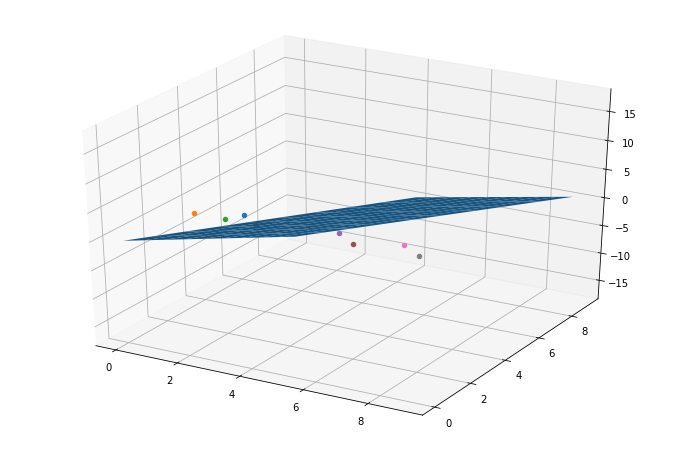

In [34]:
# # If you want to test use this
# x1 = int(input("Enter x1: "))
# x2 = int(input("Enter x2: "))
# x3 = int(input("Enter x3: "))

# print(test(x1,x2,x3,weights,bias))

fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(8):
  ax.scatter(X[i][0],X[i][1],X[i][2])

# plt.show()

pnt1 = (-bias/weights[0])
pnt2 = (-bias/weights[1])
pnt3 = (-bias/weights[2]) 
point1 = [pnt1,0,0]
point2 = [0,pnt2,0]
point3 = [0,0,pnt3]

x0, y0, z0 = point1
x1, y1, z1 = point2
x2, y2, z2 = point3

ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array(point1)
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(10), range(10))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
# plt3d = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.plot_surface(xx, yy, z)
plt.show()

